In [1]:
# Import necessary modules
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle
from tqdm import tqdm
from scipy import signal
import scipy
import pandas as pd
from pathlib import Path
import torch

In [2]:
import sys
sys.path.append('../../src/utils/')
from transforms import gaussian_noise, channels_dropout, time_masking, amplitude_flip, totensor

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

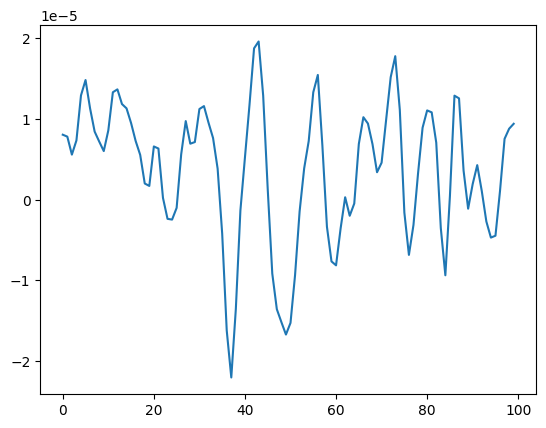

In [4]:
data_path = '/data0/practical-sose23/brain-age/data/bap/preprocessed/v1.0/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp42_eyes_closed/Exp_eyes_closed_vp42_eyes_closed_9.npy'
with open(data_path, 'rb') as in_file:
    eeg_npy = np.load(in_file)

data = totensor(eeg_npy)
    
plt.figure(1)
plt.plot(data[5, :100])
plt.show()

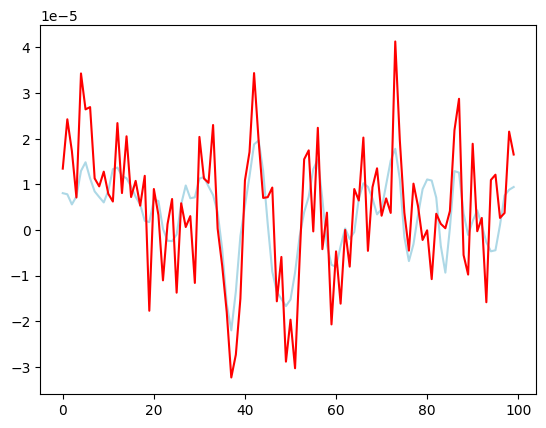

In [5]:
noisy_data = gaussian_noise(data, prob=1, std=1e-5)
plt.figure(2)
plt.plot(data[5, :100], color='lightblue')
plt.plot(noisy_data[5, :100], color='red')
plt.show()

In [6]:
droppedout_channels_data = channels_dropout(data, prob=1, max_channels=63)

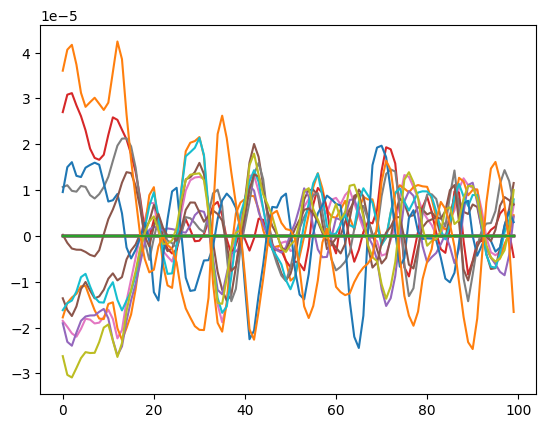

In [7]:
plt.figure(3)
for c in range(droppedout_channels_data.size(0)):
    plt.plot(droppedout_channels_data[c, :100])
plt.show()

In [22]:
time_masked_data = time_masking(data, prob=1, max_mask_size=500, mode='same_segment')

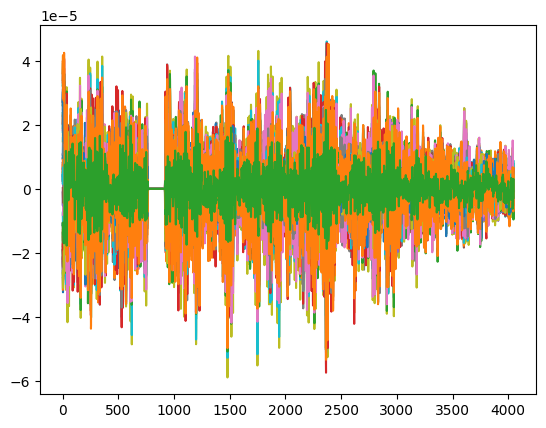

In [23]:
plt.figure(4)
for c in range(time_masked_data.size(0)):
    plt.plot(time_masked_data[c])
plt.show()

In [70]:
time_masked_data = time_masking(data, prob=1, max_mask_size=500, mode='random_segment')

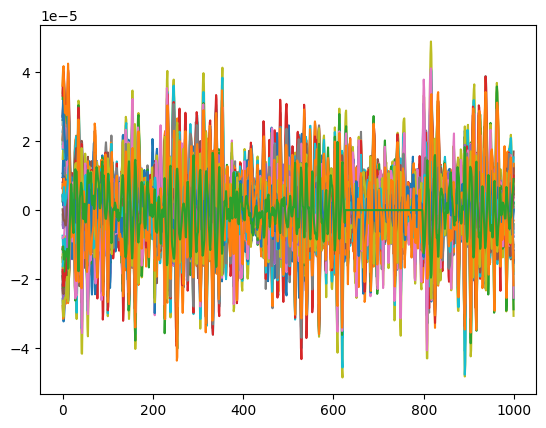

In [71]:
plt.figure(4)
for c in range(time_masked_data.size(0)):
    plt.plot(time_masked_data[c, :1000])
plt.show()

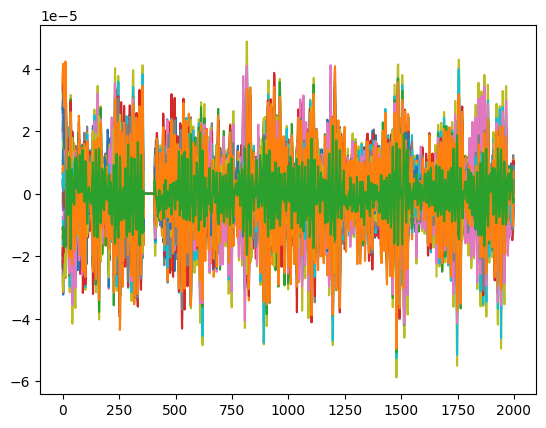

In [13]:
time_masked_data = time_masking(data, prob=1, max_mask_size=500)
plt.figure(44)
for c in range(time_masked_data.size(0)):
    plt.plot(time_masked_data[c, :2000])
plt.show()

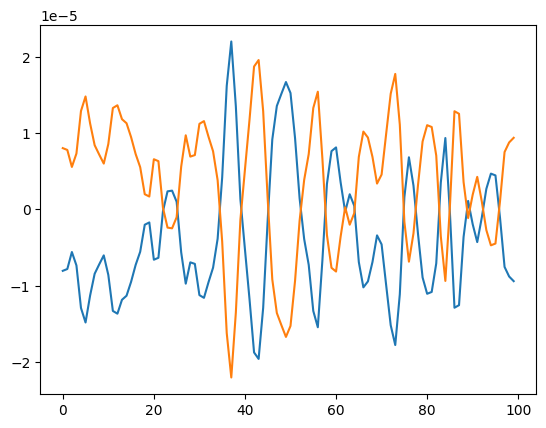

In [29]:
amplitude_filpped_data = amplitude_flip(data, prob=1)
plt.figure(5)
plt.plot(amplitude_filpped_data[5,:100])
plt.plot(data[5,:100])
plt.show()